# **Project 3 - Iris Classification**
## **Contents**
* [Introduction](#Introduction)
  * [Context](#Context)
  * [Python Libraries](#Python-Libraries)
  * [Data Source](#Data-Source)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  * [Data Importation](#Data-Importation)
  * [Data Conversion](#Data-Conversion)
  * [Data Cleaning](#Data-Cleaning)
  * [Numerical Variable Exploration](#Numerical-Variable-Exploration)
  * [Categorical Variable Exploration](#Categorical-Variable-Exploration)
  * [Summary](#Summary)
* [Feature Engineering](#Feature-Engineering)
* [Data Preprocessing](#Data-Preprocessing)
* [Machine Learning Model Development](#Machine-Learning-Model-Development)
* [Machine Learning Model Evaluation](#Machine-Learning-Model-Evaluation)
* [Conclusion](#Conclusion)

## **Introduction**
### **Context**
The purpose of this project is to build a machine learning classification model in order to accurately categorise species of iris flowers, given a dataset. This shall be done using a set of carefully chosen features from a dataset, and several machine learning classification models are then fine-tuned using grid-search cross-validation. A hard voting classifier shall be used to incorporate the chosen models, so as to improve accuracy.

### **Python Libraries**
The following Python libraries are imported for the stated purposes:
* `numpy`, for numerical calculations;
* `pandas`, for data manipulation;
* `matplotlib.pyplot`, for data visualisation;
* `seaborn`, for data visualisation;
* `warnings`, for warining handling;
* `sklearn.datasets`, for loading datasets, especially through the `load_iris` module;
* `sklearn.preprocessing`, for preprocessing data for machine learning model implementation, especially through the `StandardScaler` module;
* `sklearn.model_selection`, for ensuring the validity of a machine learning model, especially through the `GridSearchCV`, `train_test_split` and `cross_val_score` modules;
* `sklearn.neighbors`, for implementing the *k-nearest neighbors* classifiction model, especially through the `KNeighborsClassifier` module;
* `sklearn.svm`, for implementing *support vector machines*, especially through the `SVC` module;
* `sklearn.ensemble`, for implementing ensemble methods for machine learning models, especially through the `RandomForestClassifier` and `VotingClassifier` modules, and;
* `sklearn.metrics`, for evaluating the performance of machine learning models, especially through the `accuracy_score`, `precision_score`, `recall_score` and `f1_score` modules.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set a random seed value for code reproducibility
np.random.seed(42)

# Set a plot style for aesthetics
palette = sns.color_palette("viridis_r", as_cmap = True)
sns.set_style(style = "whitegrid", rc = {"font.family":"Times New Roman", "font.weight":"bold"})

# Suppress unimportant warinings
wrn.filterwarnings(category = FutureWarning, action = "ignore")
wrn.filterwarnings(category = UserWarning, action = "ignore")

### **Data Source**
The dataset in question is the `iris` dataset, loaded from the `sklearn` library, using the `load_iris()` function.

## **Exploratory Data Analysis**
### **Data Importation**

In [2]:
# Load the dataset
dataset = load_iris()
X = dataset.data
y = dataset.target

# Display the first few rows of the dataset
df = pd.concat(objs = [pd.DataFrame(data = X, columns = dataset.feature_names), pd.DataFrame(data = y, columns = ["species"])], axis = 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### **Data Conversion**
All of the columns in the dataset are already of the right type, as shown in the code below. Thus, no changes were made.

In [3]:
# Display the dataset's columns' data types
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int32
dtype: object

### **Data Cleaning**
The data was not found to have any missing values or alarming outliers. Thus, no changes were made.

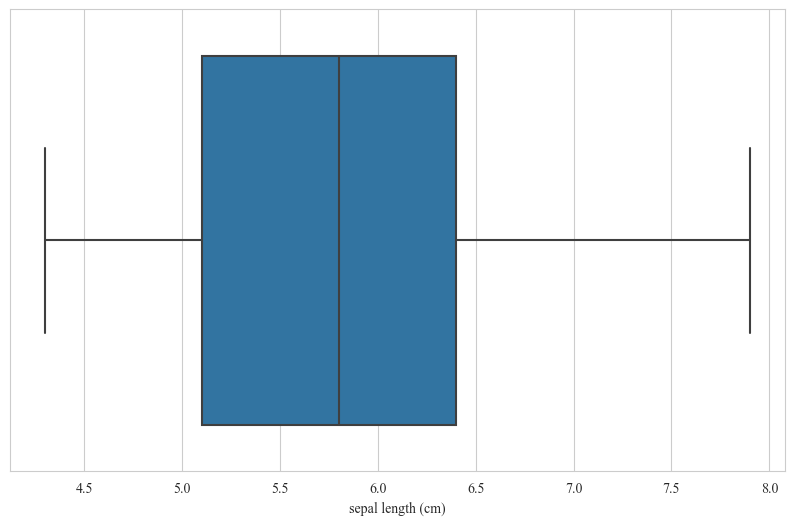

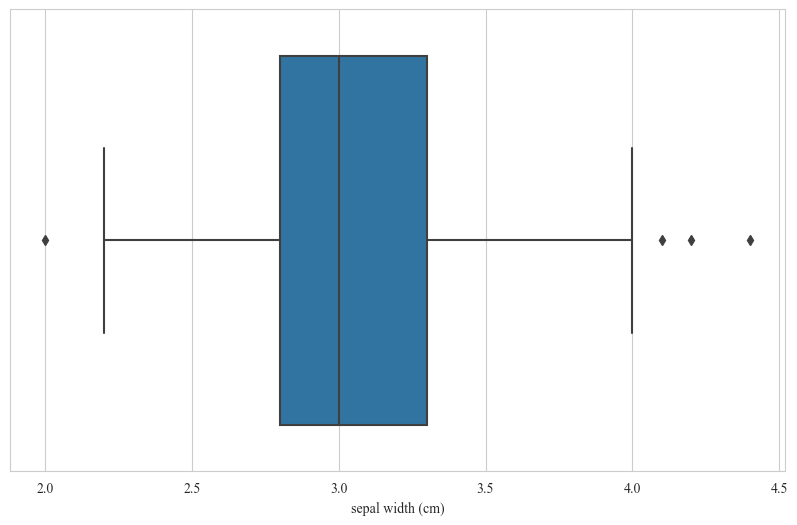

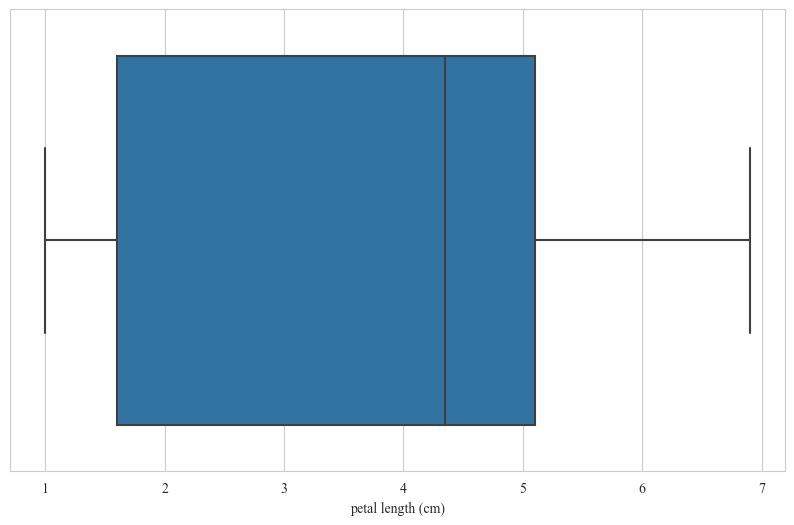

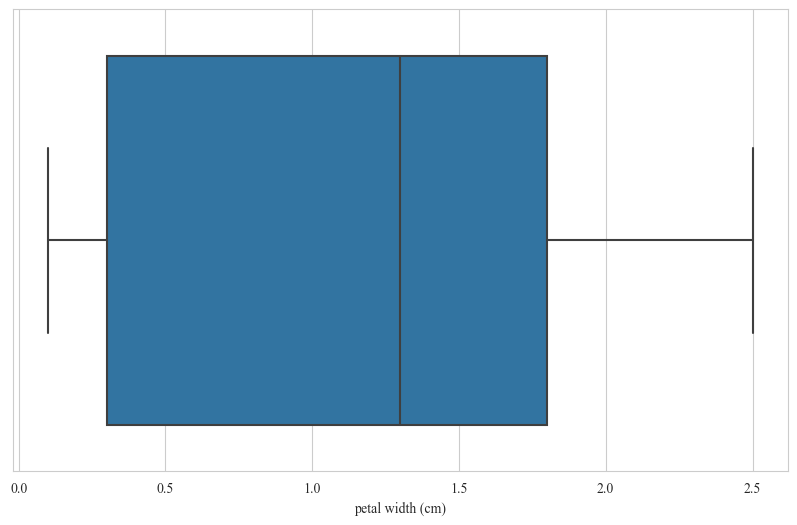

In [4]:
# Generate boxplots of the dataset's numerical variables
for x in df.columns[:-1]:
    fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
    sns.boxplot(data = df, x = x)
    plt.show()

### **Numerical Variable Exploration**
The distribution of the numerical variables is explored as per the code cell below:

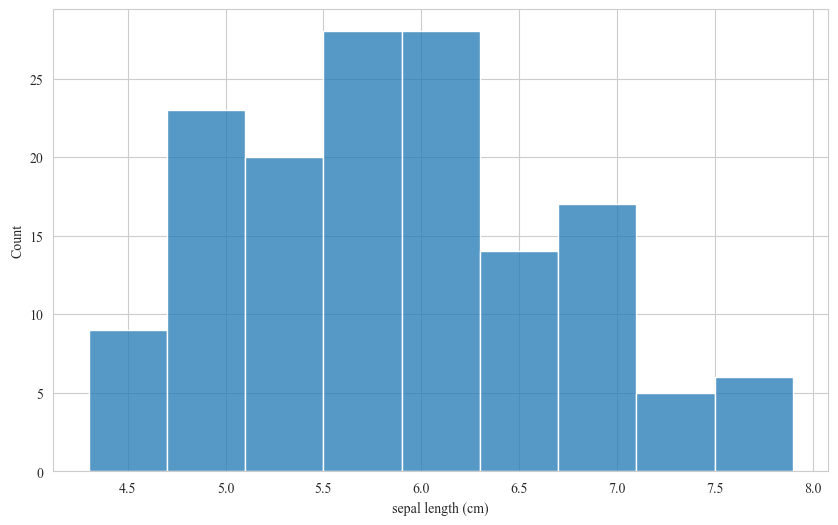

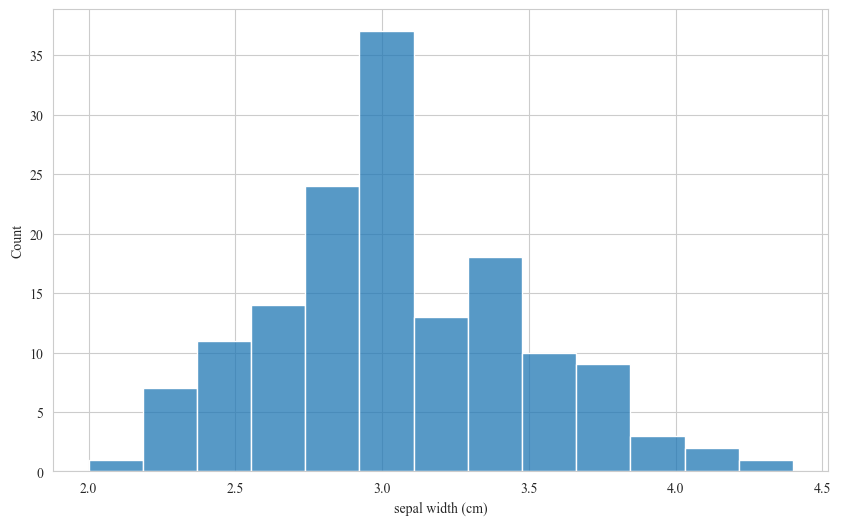

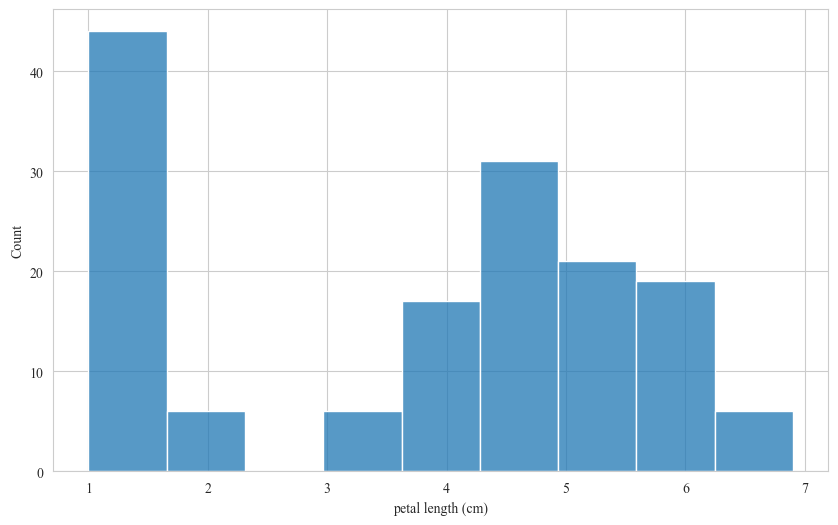

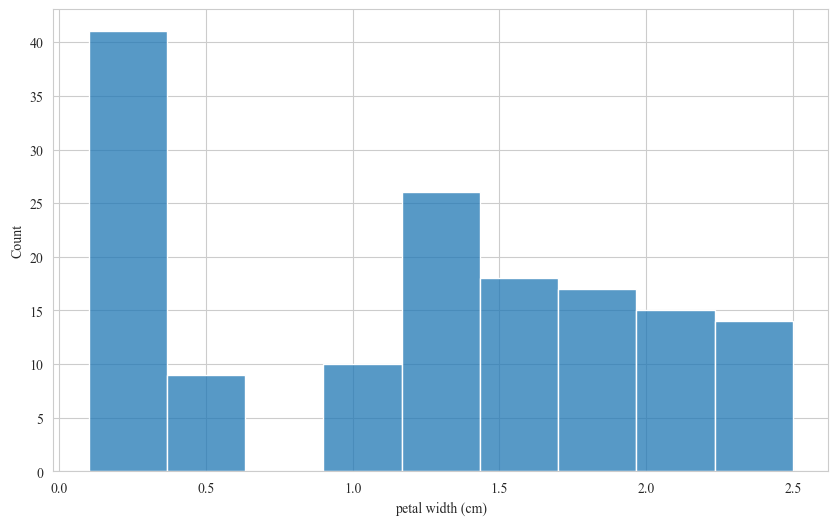

In [5]:
# Visualise the distribution of the dataset's numerical variables
for x in df.columns[:-1]:
    fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
    sns.histplot(data = df, x = x)
    plt.show()

### **Categorical Variable Exploration**
The general composition of the categorical variable is explored as per the code cell below:

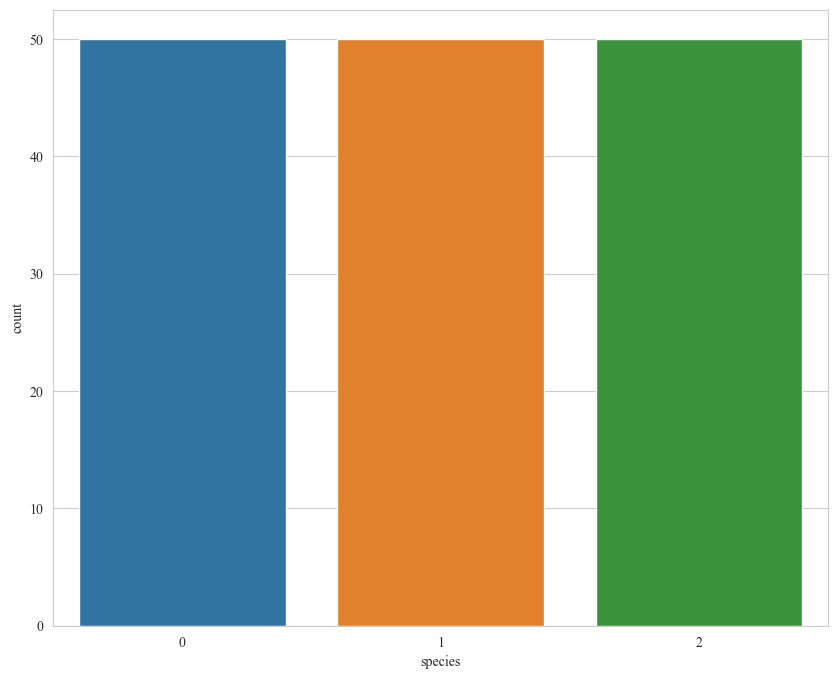

In [6]:
# Check the composition of the dataset's categorical variable
fig, ax = plt.subplots(figsize = (10, 8), dpi = 100)
sns.countplot(data = df, x = "species")
plt.show()

The dataset is, then, completely balanced.

### **Summary**
No major changes were made to the data, as its columns were already of the right type, there were no alarming outliers or missing values and the dataset is completely balanced.

## **Feature Engineering**
No features will be added to or removed from the dataset, because the sepal/petal length/width are deemed important for the prediction of the flower's species.

## **Data Preprocessing**
All numerical variables are transformed via standard scaling and the categorical variable is left unaltered. A dictionary, mapping the categorical variable's numerical values to its true values, however, shall be created. Moreover, the dataset shall be split into a training set and a testing set with a 80-20 disatribution.

In [7]:
# Create a dictionary for the iris flower species
species = {1 : "setosa", 2 : "versicolor", 3 : "virginica"}
species

{1: 'setosa', 2: 'versicolor', 3: 'virginica'}

In [8]:
# Scale the numerical variables
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [9]:
# Split the dataset into a training set and a testing set via a 80-20 distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, shuffle = True)

## **Machine Learning Model Development**
The machine learning model to be developed shall be a hard voting classifier between three other machine learning classification models:
* A random forest classifier;
* A support vector machine, and;
* A K-nearest neighbors classifier.

Each model is optimised via 5-fold grid-search cross-validation (i.e. hyperparameter tuning), using pre-determined hyperparameter grids for each model. Moreover, the voting classifier will incorporate each model with the best parameters. The Python code to accomplish this is given in the code cell below.

In [10]:
# Initialise the models and their hyperparameter grids
model_1 = RandomForestClassifier()
hyperparameter_grid_1 = {
    "n_estimators": [10, 50, 100],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10],
    "max_features": ["sqrt", "log2"]
}

model_2 = SVC()
hyperparameter_grid_2 = {
    "C": [0.1, 1, 10],
    "max_iter": [5, 10, 100],
    "tol": [1e-3, 1e-4, 1e-5]
}

model_3 = KNeighborsClassifier()
hyperparameter_grid_3 = {
    "n_neighbors": [5, 10, 15, 20, 25],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size": [10, 30, 50],
    "p": [1, 2]
}

models = [model_1, model_2, model_3]
hyperparameter_grids = [hyperparameter_grid_1, hyperparameter_grid_2, hyperparameter_grid_3]

# Tune the models through their hyperparameter grids and print the results
for model, hyperparameter_grid in zip(models, hyperparameter_grids):
    grid_search = 0
    grid_search = GridSearchCV(model, hyperparameter_grid, cv = 5, scoring = "accuracy")
    grid_search.fit(X_train, y_train)
    print(f"""Model: {model} \n Best Parameters: {grid_search.best_params_} \n Accuracy Score Achieved: {grid_search.best_score_}""")

Model: RandomForestClassifier() 
 Best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10} 
 Accuracy Score Achieved: 0.9583333333333334
Model: SVC() 
 Best Parameters: {'C': 0.1, 'max_iter': 10, 'tol': 0.001} 
 Accuracy Score Achieved: 0.95
Model: KNeighborsClassifier() 
 Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'} 
 Accuracy Score Achieved: 0.9583333333333334


In [11]:
# Initialise the models with the optimal hyperparameters
model_1 = RandomForestClassifier(max_depth = 3, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 10)
model_2 = SVC(C = 0.1, max_iter = 10, tol = 0.001)
model_3 = KNeighborsClassifier(algorithm = 'auto', leaf_size = 10, n_neighbors = 10, p = 1, weights = 'uniform')
model = VotingClassifier(estimators = [("rfc", model_1), ("svm", model_2), ("knn", model_3)], voting = "hard")

# Fit the model to the training data
model.fit_transform(X_train, y_train)

array([[0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [2, 2, 2],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [2, 2, 2],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [2, 2, 1],
       [2, 2, 2],
       [1, 1, 1],
       [2, 2, 2],
       [1, 1, 1],
       [2, 2, 2],
       [1, 1, 1],
       [0, 0, 0],
       [2, 2, 2],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [0, 0, 0],
       [2, 2, 1],
       [2, 2, 2],
       [1, 1, 1],
       [1, 1, 1],
       [2, 2, 2],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [2, 2, 1],
       [0,

In [12]:
# Predict the target variable on the testing set
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## **Machine Learning Model Evaluation**

In [13]:
# Cross-validaiton
metrics = ["5-Fold Accuracy Scores:", "5-Fold Precision Scores (Macro-Averaged):", "5-Fold Recall Scores (Macro-Averaged):", "5-Fold F1-Scores (Macro-Averaged):"]
scoring_methods = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]
for metric, scoring_method in zip(metrics, scoring_methods):
    print(f"{metric} {cross_val_score(model, X, y, scoring = scoring_method)}")

5-Fold Accuracy Scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
5-Fold Precision Scores (Macro-Averaged): [0.96969697 0.96969697 0.92307692 0.9023569  1.        ]
5-Fold Recall Scores (Macro-Averaged): [0.96666667 0.96666667 0.9        0.93333333 1.        ]
5-Fold F1-Scores (Macro-Averaged): [0.93333333 0.96658312 0.89769821 0.89974937 1.        ]


In [14]:
# Final evaluation
metrics = ["Accuracy Score:", "Precision Score (Macro-Averaged):", "Recall Score (Macro-Averaged):", "F1-Score (Macro-Averaged):"]
scores = [accuracy_score(y_pred = y_pred, y_true = y_test), precision_score(y_pred = y_pred, y_true = y_test, average="macro"), recall_score(y_pred = y_pred, y_true = y_test, average="macro"), f1_score(y_pred = y_pred, y_true = y_test, average="macro")]
for metric, score in zip(metrics, scores):
    print(f"{metric} {score}")

Accuracy Score: 1.0
Precision Score (Macro-Averaged) 1.0
Recall Score (Macro-Averaged) 1.0
F1-Score (Macro-Averaged) 1.0


## **Conclusion**
Overall, the 5-fold cross-validation scores, together with the final scores, indicate the the voting classifier performs very well and correctly classifies the species of iris flowers.